## Import packages

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read data

In [2]:
sou_rec_pos = pd.read_pickle("sou_rec_pos.pkl")
sou_rec_pos

,EnergySourcePoint,SourceX,SourceY,GroupX,GroupY,ReceiverGroupElevation,SourceSurfaceElevation,SourceDepth,ReceiverX,ReceiverY,SourceX_new,SourceY_new
0,1,1182365,1105911,1181982,1106233,1121,1137,0,129721.989048,1613693.001835,130221.977786,1613712.604415
1,1,1182365,1105911,1182018,1106201,1099,1137,0,129770.152167,1613693.56209,130221.977786,1613712.604415
2,1,1182365,1105911,1182053,1106169,1090,1137,0,129817.575656,1613693.449333,130221.977786,1613712.604415
3,1,1182365,1105911,1182089,1106137,1082,1137,0,129865.738776,1613694.009589,130221.977786,1613712.604415
4,1,1182365,1105911,1182124,1106105,1073,1137,0,129913.162265,1613693.896832,130221.977786,1613712.604415
...,...,...,...,...,...,...,...,...,...,...,...,...
3566873,3645,1201128,1105871,1200942,1106056,323,319,0,143864.517823,1626322.404387,144126.596522,1626310.752962
3566874,3645,1201128,1105871,1200978,1106024,321,319,0,143912.680943,1626322.964643,144126.596522,1626310.752962
3566875,3645,1201128,1105871,1201013,1105992,321,319,0,143960.104432,1626322.851885,144126.596522,1626310.752962
3566876,3645,1201128,1105871,1201049,1105959,320,319,0,144008.940564,1626322.67251,144126.596522,1626310.752962


## Plot receivers

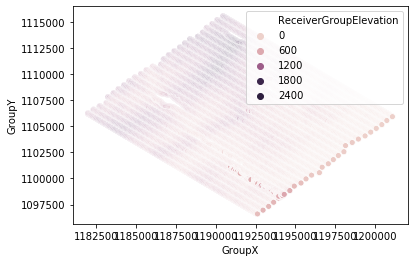

In [3]:
rec_pos_ele=sou_rec_pos.drop_duplicates(subset=['GroupX','GroupY'])
sns.scatterplot(data=rec_pos_ele, x="GroupX", y="GroupY", hue="ReceiverGroupElevation")
plt.show()

## RBF interpolation

In [4]:
x=rec_pos_ele['GroupX'].to_numpy().astype('f')
y=rec_pos_ele['GroupY'].to_numpy().astype('f')
z=rec_pos_ele['ReceiverGroupElevation'].to_numpy().astype('f')
xmin=rec_pos_ele['GroupX'].min()
xmax=rec_pos_ele['GroupX'].max()
ymin=rec_pos_ele['GroupY'].min()
ymax=rec_pos_ele['GroupY'].max()
tx = np.linspace(xmin, xmax, 100)
ty = np.linspace(ymin, ymax, 100)
XI, YI = np.meshgrid(tx, ty)
#Creating the interpolation function and populating the output matrix value
from scipy.interpolate import Rbf
rbf = Rbf(x, y, z, function='linear')
ZI = rbf(XI, YI)

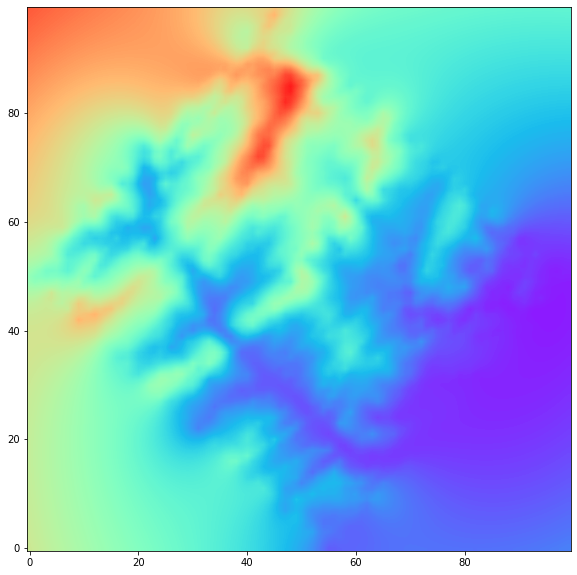

In [5]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(ZI, cmap=plt.cm.rainbow, alpha=.9, interpolation='bilinear', origin='lower')
#plt.colorbar()
plt.show()

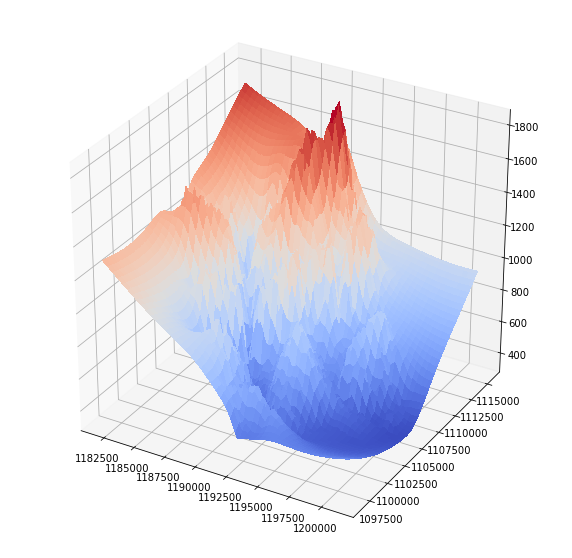

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(XI, YI, ZI, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

## Rotación de las coordenadas 

In [7]:
import math as mt
GroupX=rec_pos_ele['GroupX'].to_numpy()
GroupY=rec_pos_ele['GroupY'].to_numpy()
ind2=np.where(GroupY==GroupY.max())
ind1=np.where(GroupX==GroupX.max())
theta=mt.atan((GroupY[ind1]-GroupY[ind2])/(GroupX[ind1]-GroupX[ind2]))
theta

-0.7361218000758647

In [8]:
sou_rec_pos['ReceiverX']=sou_rec_pos['GroupX']*mt.cos(theta)+sou_rec_pos['GroupY']*mt.sin(theta)
sou_rec_pos['ReceiverY']=-sou_rec_pos['GroupX']*mt.sin(theta)+sou_rec_pos['GroupY']*mt.cos(theta)
sou_rec_pos['SourceX_new']=sou_rec_pos['SourceX']*mt.cos(theta)+sou_rec_pos['SourceY']*mt.sin(theta)
sou_rec_pos['SourceY_new']=-sou_rec_pos['SourceX']*mt.sin(theta)+sou_rec_pos['SourceY']*mt.cos(theta)
sou_rec_pos

,EnergySourcePoint,SourceX,SourceY,GroupX,GroupY,ReceiverGroupElevation,SourceSurfaceElevation,SourceDepth,ReceiverX,ReceiverY,SourceX_new,SourceY_new
0,1,1182365,1105911,1181982,1106233,1121,1137,0,133195.117308,1613410.040671,133695.147082,1613428.566994
1,1,1182365,1105911,1182018,1106201,1099,1137,0,133243.281522,1613410.497256,133695.147082,1613428.566994
2,1,1182365,1105911,1182053,1106169,1090,1137,0,133290.704658,1613410.282421,133695.147082,1613428.566994
3,1,1182365,1105911,1182089,1106137,1082,1137,0,133338.868872,1613410.739005,133695.147082,1613428.566994
4,1,1182365,1105911,1182124,1106105,1073,1137,0,133386.292008,1613410.524171,133695.147082,1613428.566994
...,...,...,...,...,...,...,...,...,...,...,...,...
3566873,3645,1201128,1105871,1200942,1106056,323,319,0,147364.797755,1626008.972571,147626.850767,1625996.757056
3566874,3645,1201128,1105871,1200978,1106024,321,319,0,147412.961969,1626009.429156,147626.850767,1625996.757056
3566875,3645,1201128,1105871,1201013,1105992,321,319,0,147460.385105,1626009.214321,147626.850767,1625996.757056
3566876,3645,1201128,1105871,1201049,1105959,320,319,0,147509.220738,1626008.929828,147626.850767,1625996.757056


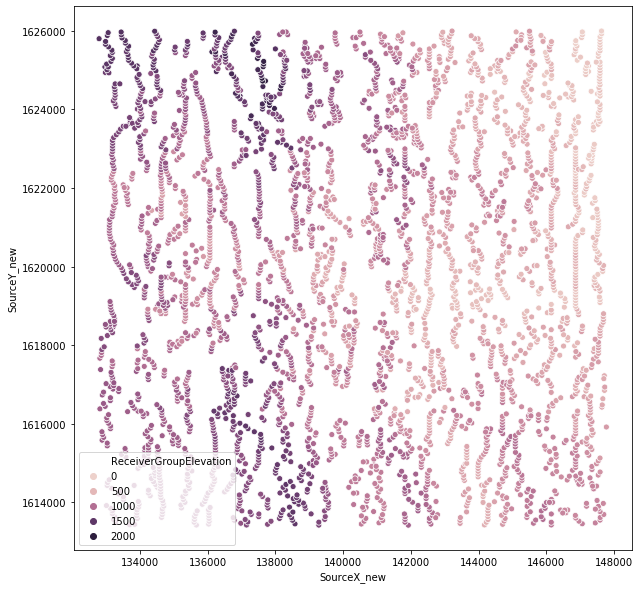

In [9]:
sou_pos_ele=sou_rec_pos.drop_duplicates(subset=['SourceX_new','SourceY_new'])
sns.scatterplot(data=sou_pos_ele, x="SourceX_new", y="SourceY_new", hue="ReceiverGroupElevation")
plt.show()

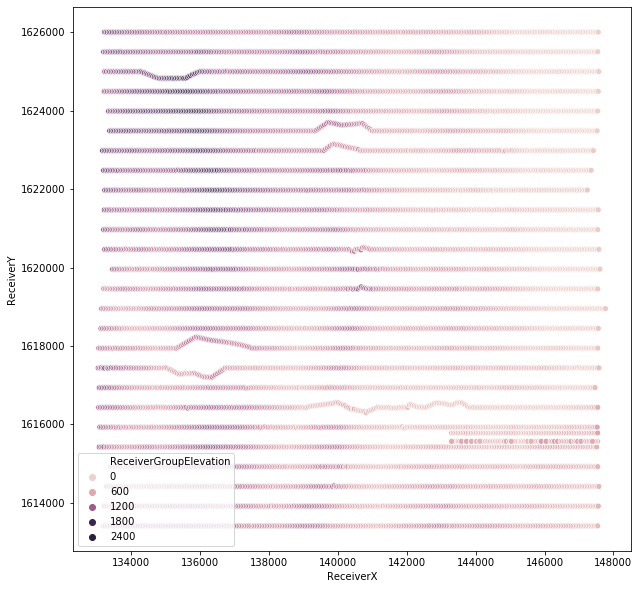

In [10]:
rec_pos_ele=sou_rec_pos.drop_duplicates(subset=['ReceiverX','ReceiverY'])
sns.scatterplot(data=rec_pos_ele, x="ReceiverX", y="ReceiverY", hue="ReceiverGroupElevation")
plt.show()

In [11]:
x=rec_pos_ele['ReceiverX'].to_numpy().astype('f')
y=rec_pos_ele['ReceiverY'].to_numpy().astype('f')
z=rec_pos_ele['ReceiverGroupElevation'].to_numpy().astype('f')
xmin=rec_pos_ele['ReceiverX'].min()
xmax=rec_pos_ele['ReceiverX'].max()
ymin=rec_pos_ele['ReceiverY'].min()
ymax=rec_pos_ele['ReceiverY'].max()
tx = np.linspace(xmin, xmax, 100)
ty = np.linspace(ymin, ymax, 100)
XI, YI = np.meshgrid(tx, ty)
#Creating the interpolation function and populating the output matrix value
from scipy.interpolate import Rbf
rbf = Rbf(x, y, z, function='linear')
ZI = rbf(XI, YI)

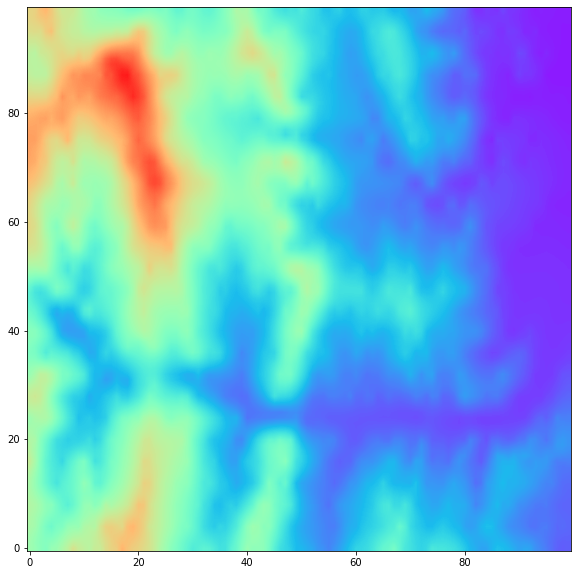

In [12]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(ZI, cmap=plt.cm.rainbow, alpha=.9, interpolation='bilinear', origin='lower')
#plt.colorbar()
plt.show()

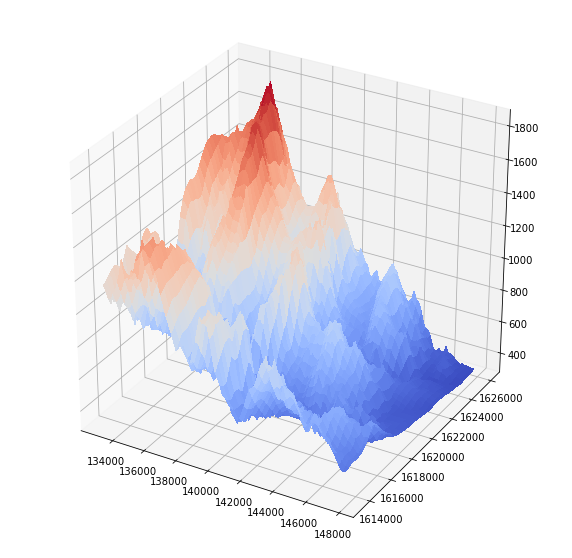

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(XI, YI, ZI, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [15]:
#sou_rec_pos.to_pickle("sou_rec_pos.pkl")